In [62]:
import numpy as np

In [49]:
#training set
train_X = np.array(([3,5], [5,1], [10,2]), dtype=float)
train_X=train_X/np.amax(train_X,axis=0)
train_y = np.array(([.75], [.82], [.93]), dtype=float)

In [50]:
#assigning shape to X and y
def shape(X,y):
  nh=np.shape(y)[0]
  nx=np.shape(X)[1]
  ny=np.shape(y)[1]
  return nx,nh,ny

In [51]:
#activation function
def sigmoid(z):
  return 1/(1+np.exp(-z)) 

In [52]:
#creating weights
def weights(nx,nh,ny):
  W1=np.random.randn(nx,nh)
  W2=np.random.randn(nh,ny)
  assert(W1.shape == (nx,nh))
  assert(W2.shape == (nh,ny))
  return W1,W2

In [53]:
#forward propogation
def forward(X,W1,W2):
  z2=np.dot(X,W1)
  a2=sigmoid(z2)
  z3=np.dot(a2,W2)
  yh=sigmoid(z3)
  return yh,a2,z3,z2

In [54]:
#finding cost (error) between target(y) and predicted target(yh)
def cost(yh,y,a2):
  j=0.5*np.sum((y-yh)**2)
  return j
#finding derivative of activation (sigmoid) function
def sigmoid_prime(z):
  return np.exp(-z)/((1+np.exp(-z))**2)
#backward propogation 
def cost_prime(yh,X,y,a2,z3,z2,W2):
  dz3 = np.multiply(-(y-yh),sigmoid_prime(z3))
  dW2 = np.dot(a2.T, dz3)     
  dz2 = np.dot(dz3, W2.T)*sigmoid_prime(z2)
  dW1 = np.dot(X.T, dz2)  
  return dW1,dW2 

In [55]:
#updating features
def update_features(W1,W2,dW1,dW2,learning_rate):
  a=learning_rate
  W1-=a*dW1
  W2-=a*dW2
  return W1,W2

In [56]:
#training the neural network
print("Training neural network:")
def neural_network(X,y,learning_rate,epochs):
  nx,nh,ny=shape(X,y)
  costs=[]
  iterations=[]
  W1,W2=weights(nx,nh,ny)
  for i in range(0,epochs):
    a=learning_rate
    yh,a2,z3,z2=forward(X,W1,W2)
    j=cost(yh,y,a2)
    costs.append(j)
    iterations.append(i)
    dW1,dW2=cost_prime(yh,X,y,a2,z3,z2,W2)
    W1,W2=update_features(W1,W2,dW1,dW2,a)
    if (i%1000==0):
      print("Cost at ",i,"th iteration is:",j)
    if (i==epochs-1):
      return yh,costs,iterations
train_yh,train_costs,train_iterations=neural_network(train_X,train_y,5,10000)

Training neural network:
Cost at  0 th iteration is: 0.24635961594295272
Cost at  1000 th iteration is: 0.00015679542365505677
Cost at  2000 th iteration is: 2.640646193950316e-05
Cost at  3000 th iteration is: 5.647760478391324e-06
Cost at  4000 th iteration is: 1.3192747085925683e-06
Cost at  5000 th iteration is: 3.203291703330874e-07
Cost at  6000 th iteration is: 7.921133761714029e-08
Cost at  7000 th iteration is: 1.976249634189589e-08
Cost at  8000 th iteration is: 4.9523009672192784e-09
Cost at  9000 th iteration is: 1.243724223933567e-09


In [57]:
#testing the neural network
print("Testing neural network:")
test_X = np.array(([3,5], [5,5], [10,0]), dtype=float)
test_X=test_X/np.amax(test_X,axis=0)
test_y = np.array(([.75], [.50], [1.0]), dtype=float)
test_yh,test_costs,test_iterations=neural_network(test_X,test_y,5,10000)

Testing neural network:
Cost at  0 th iteration is: 0.7130201996209038
Cost at  1000 th iteration is: 0.0003067999990861136
Cost at  2000 th iteration is: 3.4825063662112006e-05
Cost at  3000 th iteration is: 1.8729515155176543e-05
Cost at  4000 th iteration is: 1.2876256529770552e-05
Cost at  5000 th iteration is: 9.835310521359024e-06
Cost at  6000 th iteration is: 7.96805810474687e-06
Cost at  7000 th iteration is: 6.703091274702373e-06
Cost at  8000 th iteration is: 5.7885901870872165e-06
Cost at  9000 th iteration is: 5.096148268322149e-06


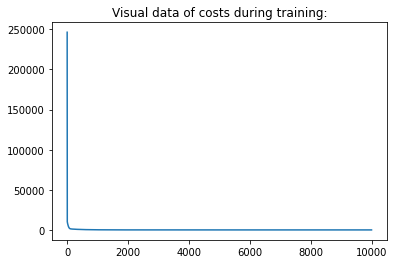

In [58]:
import matplotlib.pyplot as plt
plt.title("Visual data of costs during training:")
plot_train_x=np.array(train_iterations)
plot_train_y=np.array(train_costs)*1000000
plt.plot(plot_train_x,plot_train_y)
plt.show()

Visual data of costs during testing:


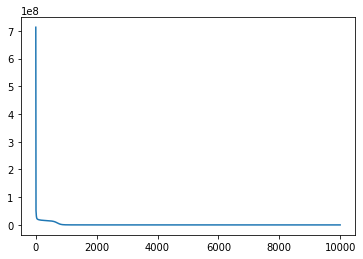

In [59]:
print("Visual data of costs during testing:")
plot_test_x=np.array(test_iterations)
plot_test_y=np.array(test_costs)*1000000000
plt.plot(plot_test_x,plot_test_y)
plt.show()

We are able to see how the cost decreases rapidly in the intial iterations and how it attains a constant value in the later iterations

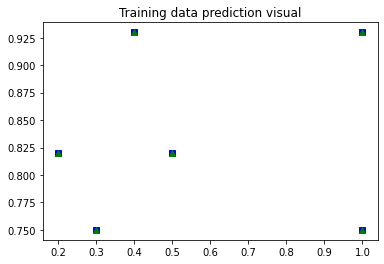

In [60]:
#comparing between the predicted value and target value in training set
plt.title('Training data prediction visual')
plt.plot(train_X,train_yh,'bs',train_X,train_y,'g^')
plt.show()

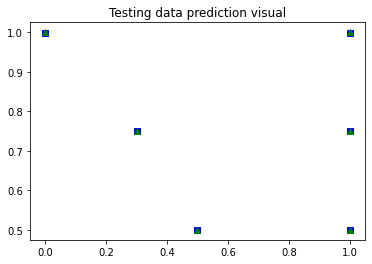

In [61]:
#comparing between the predicted value and target value in testing set
plt.title('Testing data prediction visual')
plt.plot(test_X,test_yh,'bs',test_X,test_y,'g^')
plt.show()

Thus, the neural network is able to correctly predict the target value upto very close precision 